<a href="https://colab.research.google.com/github/ShivaAtom/AI-Practices/blob/main/LSTMPredecirCancion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
with open('Cancion.txt','r') as archivo:
  texto = archivo.read()

# ***Programa***

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [ ]:
texto = texto.replace(',','').replace('.','').replace("'",'').replace("\n"," ").replace('?',' ').replace('¿',' ')
texto = texto.lower()

In [ ]:
aux = ""
arr_palabras =[]
for i in texto:
  if i != " ":
    aux = aux + i
  else:
    arr_palabras.append(aux)
    aux = ""

In [ ]:
alfabeto = list(set(arr_palabras))

In [ ]:
aux = []
x_pre,y_pre = [],[]
for i in range(len(arr_palabras)-1):
  aux.append(arr_palabras[i])
  aux.append(arr_palabras[i+1])
  x_pre.append(aux)
  aux=[]
x_pre.pop()
print(len(x_pre))
for i in range(len(arr_palabras)):
  if i != 1 and i != 0:
    y_pre.append(arr_palabras[i])
print(len(y_pre))

156
156


In [ ]:
tam = len(alfabeto)
etiqueta = np.arange(tam)

one_hot = tf.one_hot(etiqueta,tam)

In [ ]:
pal_a_ind = {alfabeto[ind]:vec for ind, vec in enumerate(one_hot)}

In [ ]:
def conversion( diccionario, array):
  aux =[]
  for i in array:
    aux.append(diccionario[i])
  return aux

In [ ]:
Y = conversion(pal_a_ind,y_pre)
X = []
for i in x_pre:
  X.append(conversion(pal_a_ind,i))

X = np.array(X)
Y = np.array(Y)

In [ ]:
len(Y[0])

74

In [ ]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(len(X[0]),len(Y[0]))),
    keras.layers.LSTM(320),
    keras.layers.Dense(250),
    keras.layers.Dense(len(Y[0]), activation='softmax')
])

In [ ]:
modelo.compile(
    optimizer = 'adam',
    loss = keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.categorical_crossentropy]
)

In [ ]:
his = modelo.fit(X,Y,epochs=1000,verbose=False)

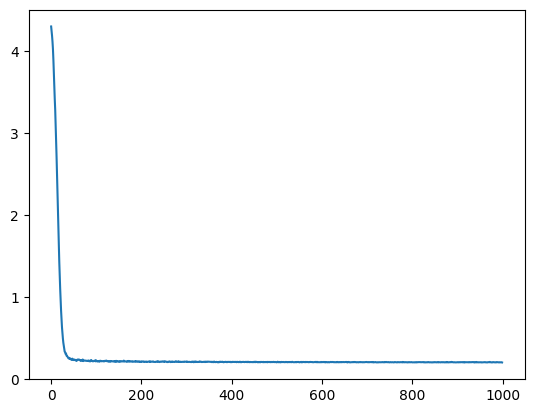

In [ ]:
plt.plot(his.history['loss'])

# ***Test***

In [ ]:
test = ['no','mires']

In [ ]:
ar_test = conversion(pal_a_ind,test)
ar_test = np.array([ar_test])
res = modelo.predict(ar_test)

1/1 [==============================] - 0s 19ms/step


In [ ]:
# Array original
array = np.array(res[0])

# Obtener el índice del valor más alto
indice_maximo = np.argmax(array)

# Crear un nuevo array con ceros
nuevo_array = np.zeros_like(array)

# Establecer el valor más alto en 1
nuevo_array[indice_maximo] = 1

indices =np.where(nuevo_array == 1)
id=indices[0][0]
print(alfabeto[id])

atrás
